# STA 160 Midterm Project Group 31
## Xinyu Xiong, Yueling Feng, Yuxin Yang, Yixuan Deng

## Preprocessing data

In [91]:
# Read the dataset and import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from collections import Counter
from scipy.stats import kurtosis, skew

df = pd.read_csv ('C:/Users/yang/Desktop/Airbnb_NYC_2019.csv') 

# Drop columns "last_review" and "reviews_per_month" as we will not use these two variables, and drop NA after that
df.drop(["last_review", "reviews_per_month"], axis="columns", inplace=True)
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [92]:
# Drop remaining NA values
df.dropna(how='any',inplace=True)
df.shape

(48858, 14)

## Separate normal hosts and mega hosts

In [93]:
# Separate normal hosts and mega hosts in the way that having more than 50 listing airbnbs are mega hosts
normal = df[df.calculated_host_listings_count <= 50]
len(pd.unique(normal["host_id"]))
# There are 37414 normal hosts

37414

In [94]:
mega = df[df.calculated_host_listings_count > 50]
len(pd.unique(mega["host_id"]))
# There are 11 mega hosts

11

In [95]:
# Find Mega hosts id
top_host=df.host_id.value_counts().head(11)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
7503643       52
Name: host_id, dtype: int64

In [96]:
# general comparison through calculating means
normal.mean(axis=0)

id                                1.887260e+07
host_id                           6.660361e+07
latitude                          4.072861e+01
longitude                        -7.395134e+01
price                             1.507662e+02
minimum_nights                    6.470675e+00
number_of_reviews                 2.386732e+01
calculated_host_listings_count    2.510455e+00
availability_365                  1.080655e+02
dtype: float64

In [97]:
mega.mean(axis=0)

id                                2.444396e+07
host_id                           1.045988e+08
latitude                          4.074093e+01
longitude                        -7.398203e+01
price                             2.237262e+02
minimum_nights                    2.649319e+01
number_of_reviews                 1.906203e+00
calculated_host_listings_count    1.739168e+02
availability_365                  2.830953e+02
dtype: float64

## Minimum nights

In [98]:
# Check kurtosis and skewness of normal and mega minimum nights
# Do a Mann Whitney Test on minimum nights of normal and mega hosts
normal_mn = normal['minimum_nights']
mega_mn = mega['minimum_nights']
print("kurtosis of normal minimum nights: {}".format(kurtosis(normal_mn)))
print("skewness of normal minimum nights: {}".format(skew(normal_mn)))
print("kurtosis of mega minimum nights: {}".format(kurtosis(mega_mn)))
print("skewness of mega minimum nights: {}".format(skew(mega_mn)))
print(stats.mannwhitneyu(normal_mn, mega_mn, alternative='two-sided'))

kurtosis of normal minimum nights: 860.3209689242316
skewness of normal minimum nights: 21.919069281814533
kurtosis of mega minimum nights: 26.835357974417985
skewness of mega minimum nights: 1.9843536834677138
MannwhitneyuResult(statistic=8307742.0, pvalue=0.0)


([<matplotlib.axis.XTick at 0x2371c505610>,
 [Text(1, 0, 'normal'), Text(2, 0, 'mega')])

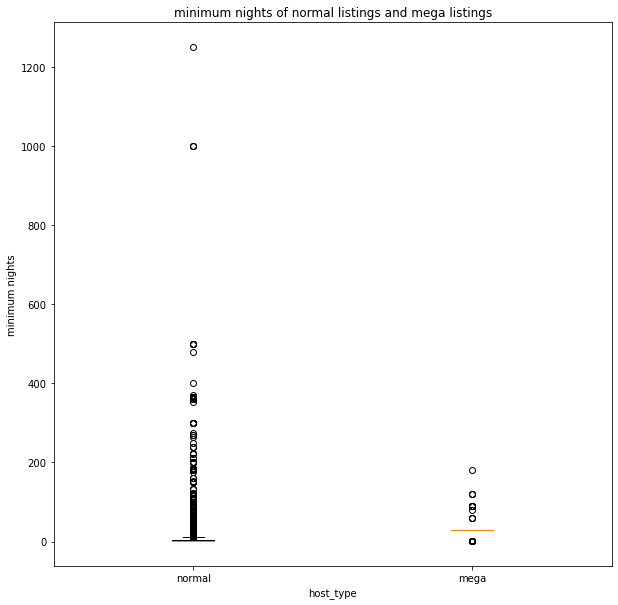

In [99]:
# Plot boxplot of minimum nights of normal and mega hosts
plt.figure(figsize=(10,10))
plt.boxplot([normal_mn, mega_mn])
plt.title("minimum nights of normal listings and mega listings")
plt.xlabel("host_type")
plt.ylabel("minimum nights")
plt.xticks([1,2], ["normal", "mega"])

In [100]:
np.median(normal_mn)

2.0

In [101]:
np.median(mega_mn)

30.0

Text(0.5, 1.0, 'minimum nights of different neighborhood groups of all listings')

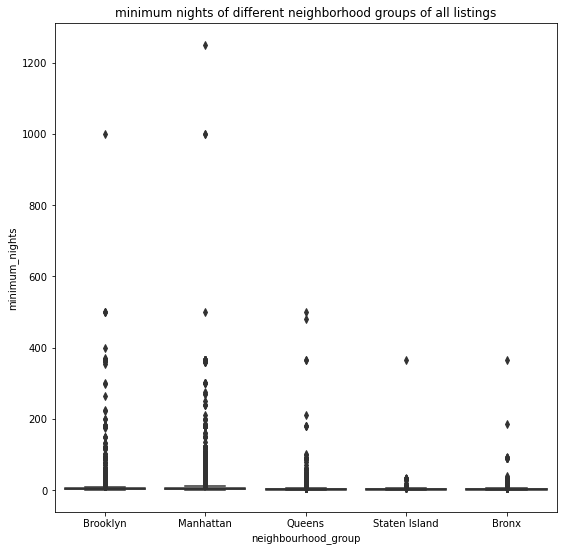

In [102]:
# Plot boxplot of minimum nights of different neighborhood groups of all listings
plt.figure(figsize=(9,9))
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'minimum_nights', palette = 'plasma')
plt.title("minimum nights of different neighborhood groups of all listings")

In [103]:
df.groupby("neighbourhood_group")["minimum_nights"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,4.564738,15.645771,1.0,1.0,2.0,3.0,365.0
Brooklyn,20089.0,6.057693,17.638145,1.0,2.0,3.0,5.0,999.0
Manhattan,21643.0,8.538188,23.097047,1.0,2.0,3.0,6.0,1250.0
Queens,5664.0,5.182910,15.031173,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


Text(0.5, 1.0, 'minimum nights of different neighborhood groups of normal listings')

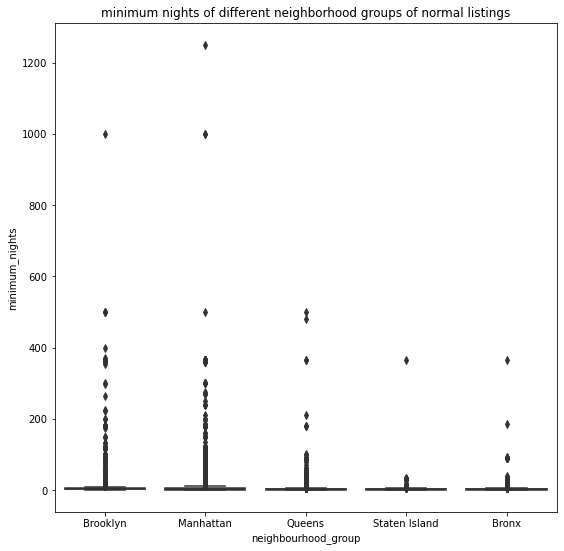

In [104]:
# Plot boxplot of minimum nights of different neighborhood groups of normal listings
plt.figure(figsize=(9,9))
sns.boxplot(data = normal, x = 'neighbourhood_group', y = 'minimum_nights', palette = 'plasma')
plt.title("minimum nights of different neighborhood groups of normal listings")

In [105]:
normal.groupby("neighbourhood_group")["minimum_nights"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,4.564738,15.645771,1.0,1.0,2.0,3.0,365.0
Brooklyn,20028.0,5.984771,17.615346,1.0,2.0,3.0,5.0,999.0
Manhattan,20461.0,7.524950,23.140721,1.0,1.0,3.0,5.0,1250.0
Queens,5585.0,4.831871,14.842373,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


Text(0.5, 1.0, 'minimum nights of different neighborhood groups of mega listings')

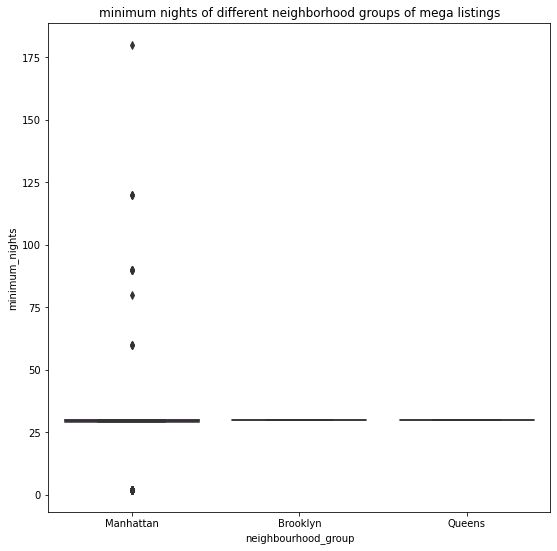

In [106]:
# Plot boxplot of minimum nights of different neighborhood groups of mega listings
plt.figure(figsize=(9,9))
sns.boxplot(data = mega, x = 'neighbourhood_group', y = 'minimum_nights', palette = 'plasma')
plt.title("minimum nights of different neighborhood groups of mega listings")

In [107]:
mega.groupby("neighbourhood_group")["minimum_nights"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Brooklyn,61.0,30.000000,0.000000,30.0,30.0,30.0,30.0,30.0
Manhattan,1182.0,26.077834,13.162594,2.0,29.0,30.0,30.0,180.0
Queens,79.0,30.000000,0.000000,30.0,30.0,30.0,30.0,30.0


## Availability_365

In [108]:
# Check kurtosis and skewness of normal and mega availability
# Do a Mann Whitney Test on availability of normal and mega hosts
normal_a = normal['availability_365']
mega_a = mega['availability_365']
print("kurtosis of normal availability: {}".format(kurtosis(normal_a)))
print("skewness of normal availability: {}".format(skew(normal_a)))
print("kurtosis of mega availability: {}".format(kurtosis(mega_a)))
print("skewness of mega availability: {}".format(skew(mega_a)))
print(stats.mannwhitneyu(normal_a, mega_a, alternative='two-sided'))

kurtosis of normal availability: -0.8615410316559724
skewness of normal availability: 0.8337209374847797
kurtosis of mega availability: 2.090875095519692
skewness of mega availability: -1.5945120334424905
MannwhitneyuResult(statistic=10419674.0, pvalue=0.0)


([<matplotlib.axis.XTick at 0x2371bc1aac0>,
 [Text(1, 0, 'normal'), Text(2, 0, 'mega')])

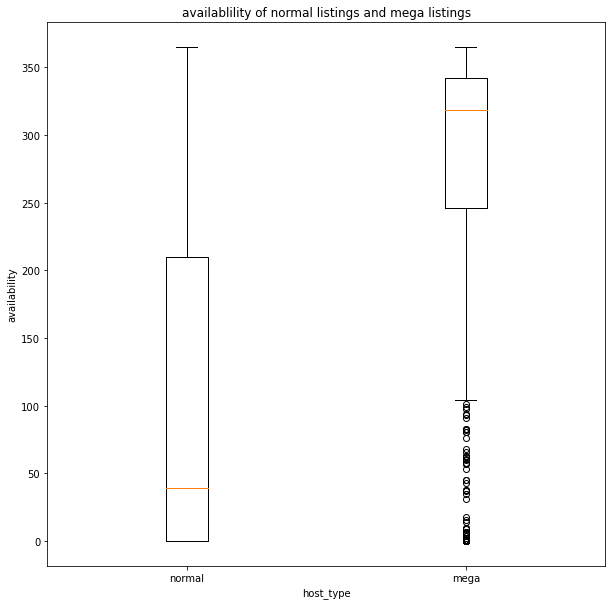

In [109]:
# Plot boxplot of availabilty of normal and mega listings
plt.figure(figsize=(10,10))
plt.boxplot([normal_a, mega_a])
plt.title("availablility of normal listings and mega listings")
plt.xlabel("host_type")
plt.ylabel("availability")
plt.xticks([1,2], ["normal", "mega"])

In [110]:
np.median(normal_a)

39.0

In [111]:
np.median(mega_a)

318.5

Text(0.5, 1.0, 'availability of different neighborhood groups of all listings')

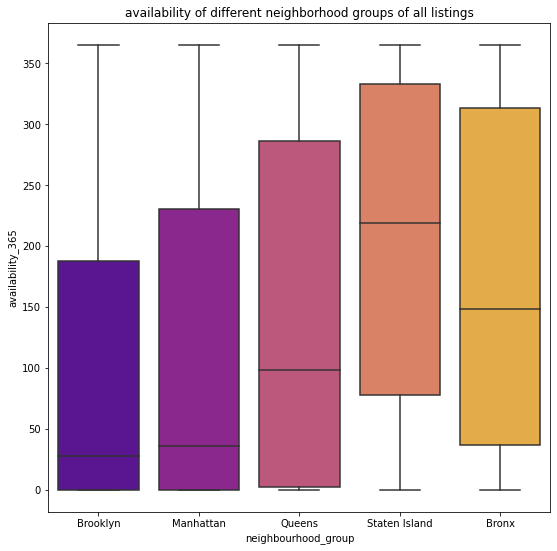

In [112]:
# Plot boxplot of availability of different neighborhood groups of all listings
plt.figure(figsize=(9,9))
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'availability_365', palette = 'plasma')
plt.title("availability of different neighborhood groups of all listings")

Text(0.5, 1.0, 'availability of different neighborhood groups of normal listings')

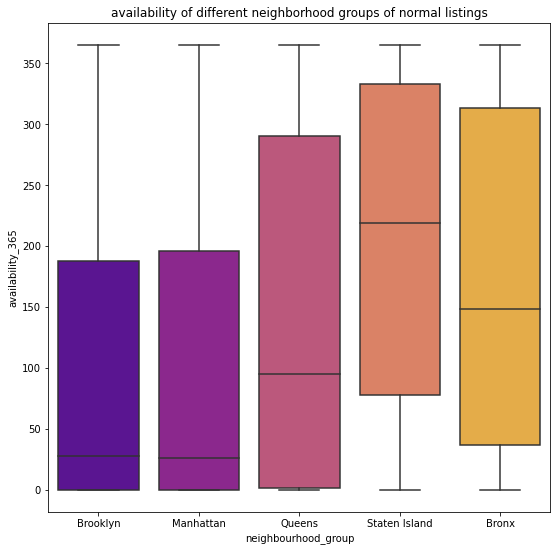

In [113]:
# Plot boxplot of availability of different neighborhood groups of normal listings
plt.figure(figsize=(9,9))
sns.boxplot(data = normal, x = 'neighbourhood_group', y = 'availability_365', palette = 'plasma')
plt.title("availability of different neighborhood groups of normal listings")

Text(0.5, 1.0, 'availability of different neighborhood groups of mega listings')

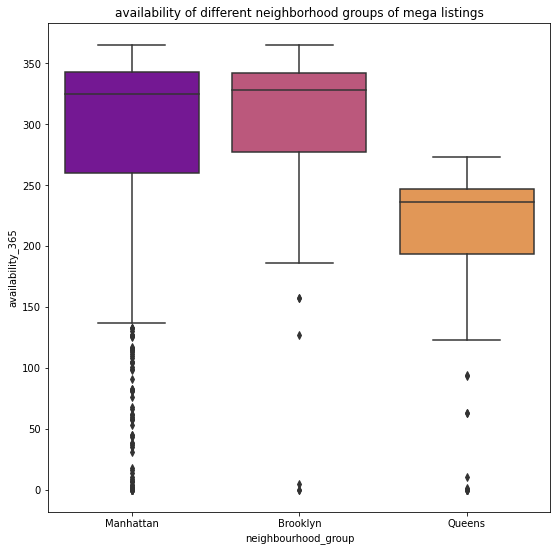

In [114]:
# Plot boxplot of availability of different neighborhood groups of mega listings
plt.figure(figsize=(9,9))
sns.boxplot(data = mega, x = 'neighbourhood_group', y = 'availability_365', palette = 'plasma')
plt.title("availability of different neighborhood groups of mega listings")

## Number of reviews

In [115]:
# Check kurtosis and skewness of normal and mega number of reviews
# Do a Mann Whitney Test on reviews of normal and mega hosts
normal_r = normal['number_of_reviews']
mega_r = mega['number_of_reviews']
print("kurtosis of normal reviews: {}".format(kurtosis(normal_r)))
print("skewness of normal reviews: {}".format(skew(normal_r)))
print("kurtosis of mega reviews: {}".format(kurtosis(mega_r)))
print("skewness of mega reviews: {}".format(skew(mega_r)))
print(stats.mannwhitneyu(normal_r, mega_r, alternative='two-sided'))

kurtosis of normal reviews: 19.02534993637514
skewness of normal reviews: 3.6410282657513124
kurtosis of mega reviews: 4.111381943388847
skewness of mega reviews: 2.0162248504615037
MannwhitneyuResult(statistic=47658730.5, pvalue=1.7617294348968757e-228)


([<matplotlib.axis.XTick at 0x237251cad30>,
 [Text(1, 0, 'normal'), Text(2, 0, 'mega')])

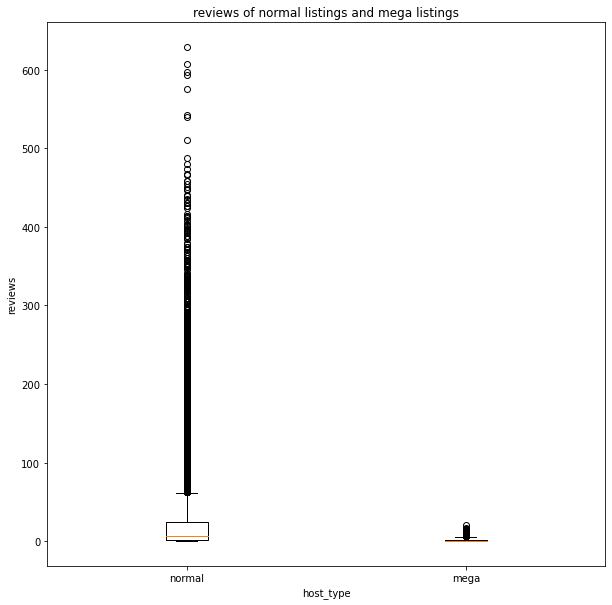

In [116]:
# Plot boxplot of reviews of normal and mega listings
plt.figure(figsize=(10,10))
plt.boxplot([normal_r, mega_r])
plt.title("reviews of normal listings and mega listings")
plt.xlabel("host_type")
plt.ylabel("reviews")
plt.xticks([1,2], ["normal", "mega"])

In [117]:
np.median(normal_r)

6.0

In [118]:
np.median(mega_r)

0.0

Text(0.5, 1.0, 'reviews of different neighbourhood group in all listings')

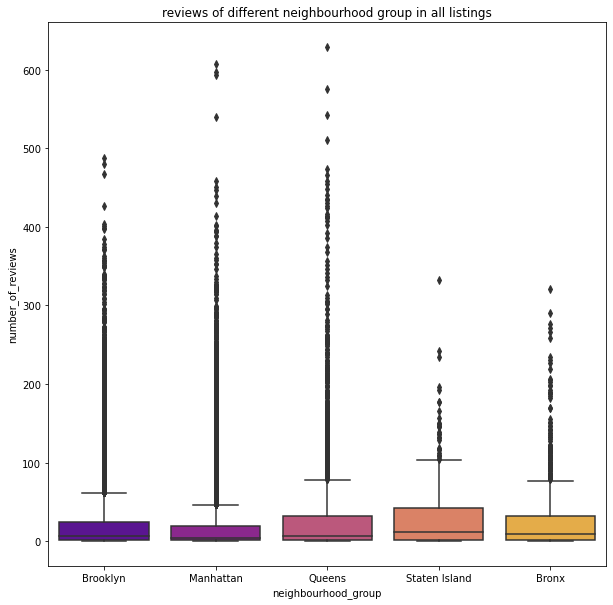

In [119]:
# Plot review of different neighbourhood group in all listings
plt.figure(figsize=(10,10))
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'number_of_reviews', palette = 'plasma')
plt.title("reviews of different neighbourhood group in all listings")

In [120]:
df.groupby("neighbourhood_group")["number_of_reviews"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,26.018365,42.244883,0.0,1.0,9.0,32.0,321.0
Brooklyn,20089.0,24.201006,44.333561,0.0,1.0,6.0,25.0,488.0
Manhattan,21643.0,20.982581,42.576172,0.0,1.0,4.0,19.0,607.0
Queens,5664.0,27.701624,51.963753,0.0,1.0,7.0,32.0,629.0
Staten Island,373.0,30.941019,44.830766,0.0,1.0,12.0,42.0,333.0


Text(0.5, 1.0, 'reviews of different neighbourhood group in normal listings')

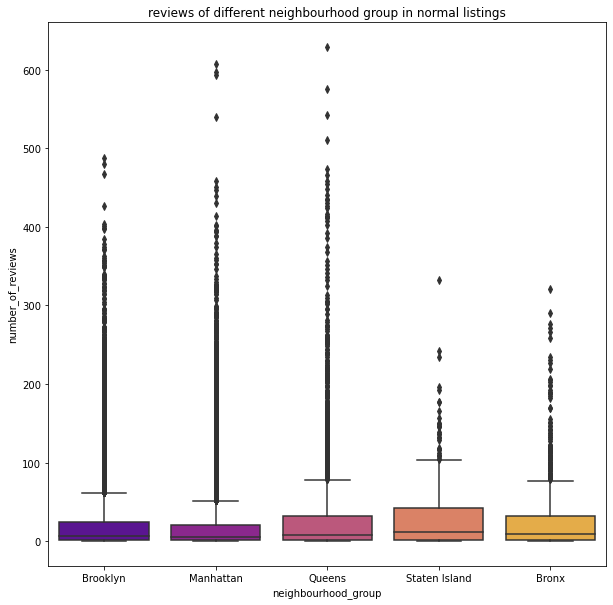

In [121]:
# Plot review of different neighbourhood group in normal listings
plt.figure(figsize=(10,10))
sns.boxplot(data = normal, x = 'neighbourhood_group', y = 'number_of_reviews', palette = 'plasma')
plt.title("reviews of different neighbourhood group in normal listings")

In [122]:
normal.groupby("neighbourhood_group")["number_of_reviews"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,26.018365,42.244883,0.0,1.0,9.0,32.0,321.0
Brooklyn,20028.0,24.262283,44.386776,0.0,1.0,6.0,25.0,488.0
Manhattan,20461.0,22.086359,43.526853,0.0,1.0,5.0,21.0,607.0
Queens,5585.0,28.083796,52.229770,0.0,1.0,8.0,32.0,629.0
Staten Island,373.0,30.941019,44.830766,0.0,1.0,12.0,42.0,333.0


Text(0.5, 1.0, 'reviews of different neighbourhood group in mega listings')

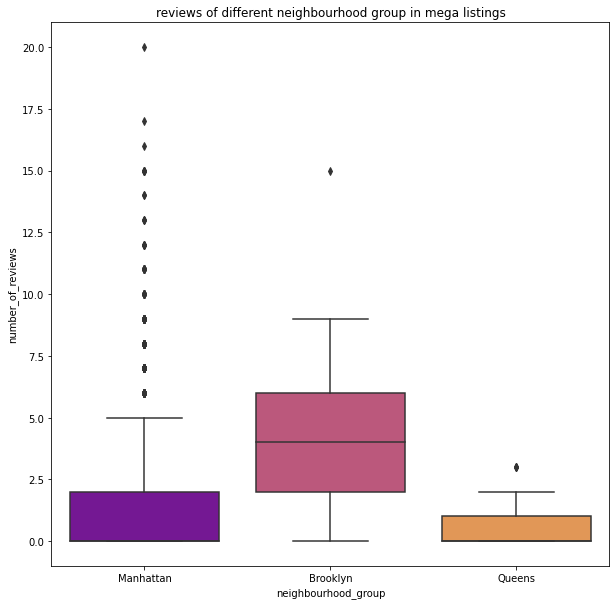

In [123]:
# Plot review of different neighbourhood group in mega listings
plt.figure(figsize=(10,10))
sns.boxplot(data = mega, x = 'neighbourhood_group', y = 'number_of_reviews', palette = 'plasma')
plt.title("reviews of different neighbourhood group in mega listings")

In [124]:
mega.groupby("neighbourhood_group")["number_of_reviews"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Brooklyn,61.0,4.081967,3.094592,0.0,2.0,4.0,6.0,15.0
Manhattan,1182.0,1.875635,3.109179,0.0,0.0,0.0,2.0,20.0
Queens,79.0,0.683544,0.884979,0.0,0.0,0.0,1.0,3.0


## Price

In [125]:
# Check kurtosis and skewness of normal and mega price
# Do a Mann Whitney Test on price of normal and mega hosts
normal_p = normal['price']
mega_p = mega['price']
print("kurtosis of normal price: {}".format(kurtosis(normal_p)))
print("skewness of normal price: {}".format(skew(normal_p)))
print("kurtosis of mega price: {}".format(kurtosis(mega_p)))
print("skewness of mega price: {}".format(skew(mega_p)))
print(stats.mannwhitneyu(normal_p, mega_p, alternative='two-sided'))

kurtosis of normal price: 579.9429289534693
skewness of normal price: 19.112590946114434
kurtosis of mega price: 8.561097629737931
skewness of mega price: 1.7565529152545267
MannwhitneyuResult(statistic=15245214.0, pvalue=1.7508470125599684e-224)


([<matplotlib.axis.XTick at 0x237238a1670>,
 [Text(1, 0, 'normal'), Text(2, 0, 'mega')])

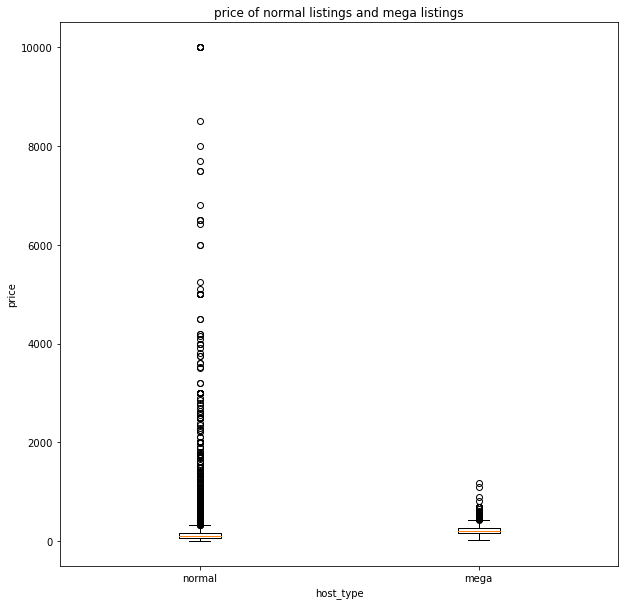

In [126]:
# Plot boxplot of price of normal and mega listings
plt.figure(figsize=(10,10))
plt.boxplot([normal_p, mega_p])
plt.title("price of normal listings and mega listings")
plt.xlabel("host_type")
plt.ylabel("price")
plt.xticks([1,2], ["normal", "mega"])

In [127]:
np.median(normal_p)

101.0

In [128]:
np.median(mega_p)

215.0

Text(0.5, 1.0, 'price of different room types in normal listings')

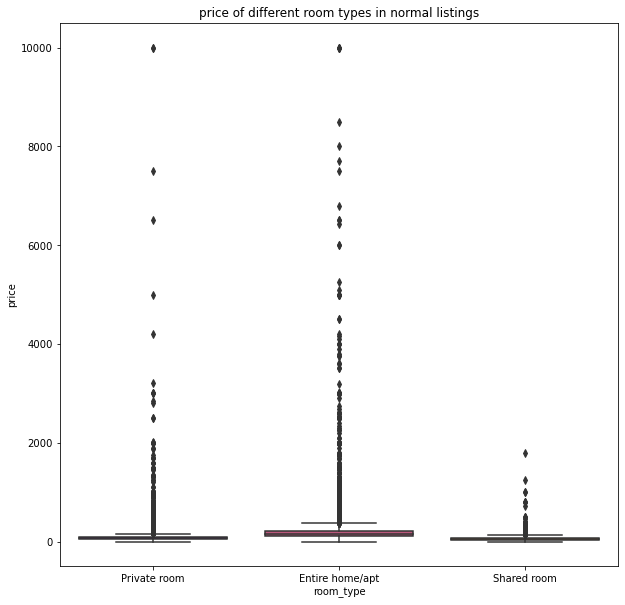

In [129]:
# Plot price of different room types in normal listings
plt.figure(figsize=(10,10))
sns.boxplot(data = normal, x = 'room_type', y = 'price', palette = 'plasma')
plt.title("price of different room types in normal listings")

In [130]:
normal.groupby("room_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,24181.0,210.478764,290.119479,0.0,119.0,159.0,225.0,10000.0
Private room,22196.0,89.926789,160.567104,0.0,50.0,70.0,96.0,10000.0
Shared room,1159.0,70.075928,101.753942,0.0,33.0,45.0,75.0,1800.0


Text(0.5, 1.0, 'price of different room types in mega listings')

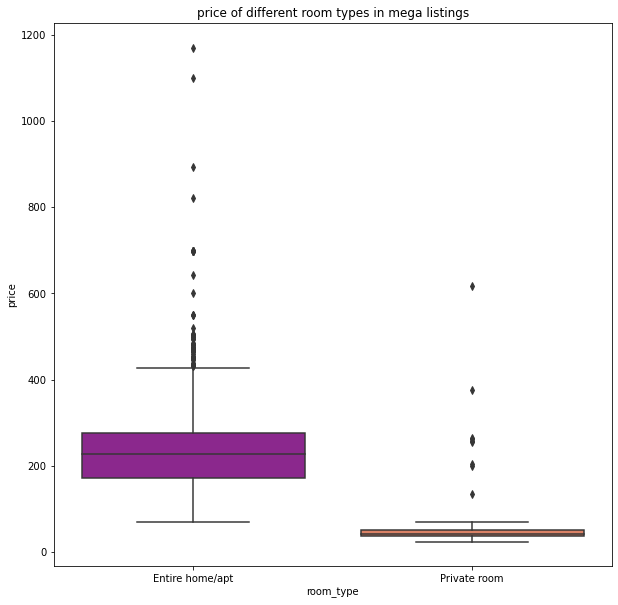

In [131]:
# Plot price of different room types in mega listings
plt.figure(figsize=(10,10))
sns.boxplot(data = mega, x = 'room_type', y = 'price', palette = 'plasma')
plt.title("price of different room types in mega listings")

In [132]:
mega.groupby("room_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,1212.0,238.306931,106.236830,70.0,171.5,227.0,275.25,1170.0
Private room,110.0,63.072727,77.281412,24.0,37.0,41.5,52.00,616.0


Text(0.5, 1.0, 'price of different neighbourhood group in all listings')

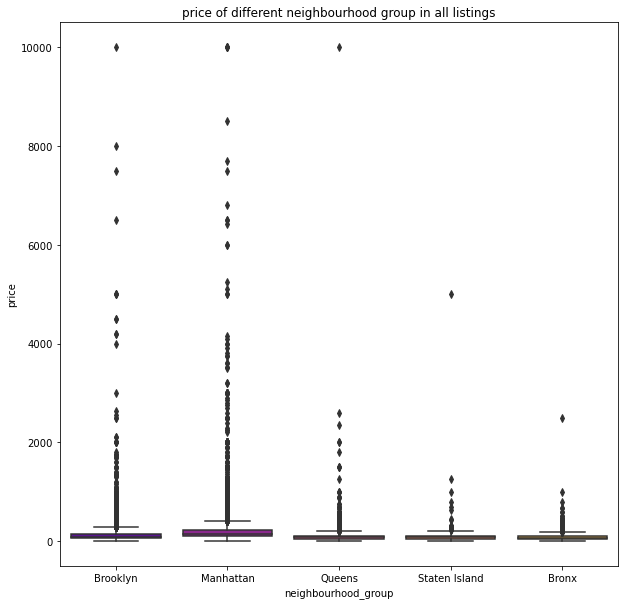

In [133]:
# Plot price of different neighbourhood group in all listings
plt.figure(figsize=(10,10))
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'price', palette = 'plasma')
plt.title("price of different neighbourhood group in all listings")

In [134]:
df.groupby("neighbourhood_group")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,87.469238,106.798933,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.410523,186.936694,0.0,60.0,90.0,150.0,10000.0
Manhattan,21643.0,196.897473,291.489822,0.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.536017,167.128794,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Text(0.5, 1.0, 'price of different neighbourhood group in normal listings')

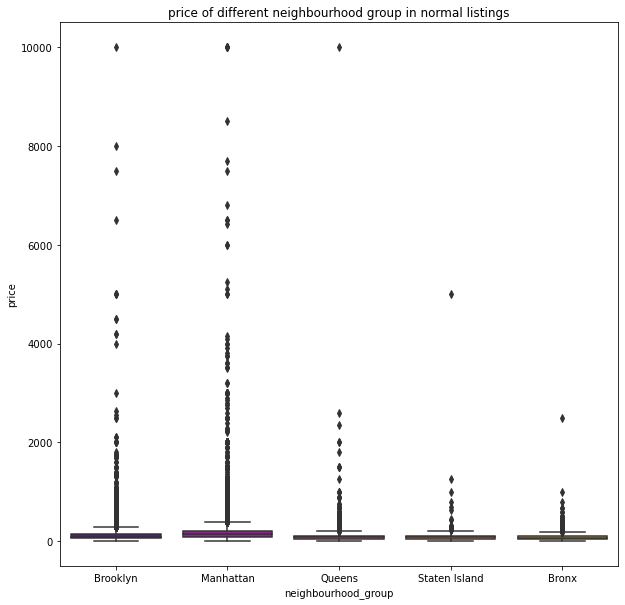

In [135]:
# Plot price of different neighbourhood group in normal listings
plt.figure(figsize=(10,10))
sns.boxplot(data = normal, x = 'neighbourhood_group', y = 'price', palette = 'plasma')
plt.title("price of different neighbourhood group in normal listings")

In [136]:
normal.groupby("neighbourhood_group")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,87.469238,106.798933,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20028.0,124.350060,187.199558,0.0,60.0,90.0,150.0,10000.0
Manhattan,20461.0,194.416500,298.457405,0.0,90.0,145.0,209.0,10000.0
Queens,5585.0,100.322650,168.170734,10.0,50.0,75.0,112.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Text(0.5, 1.0, 'price of different neighbourhood group in mega listings')

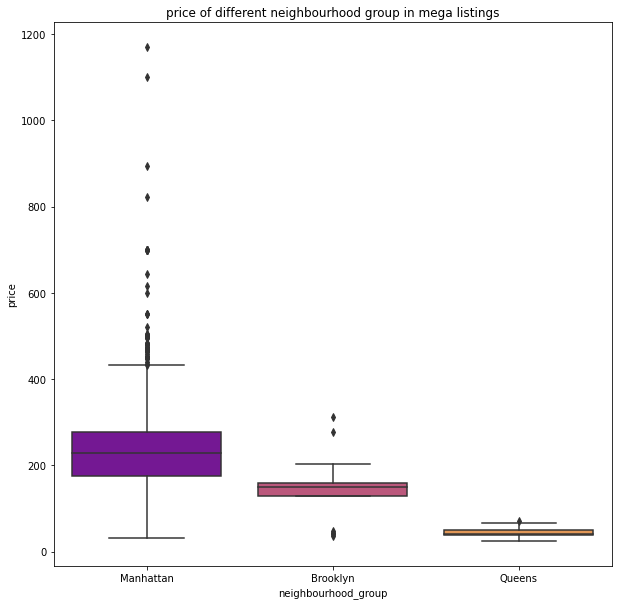

In [137]:
# Plot price of different neighbourhood group in mega listings
plt.figure(figsize=(10,10))
sns.boxplot(data = mega, x = 'neighbourhood_group', y = 'price', palette = 'plasma')
plt.title("price of different neighbourhood group in mega listings")

In [138]:
mega.groupby("neighbourhood_group")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Brooklyn,61.0,144.262295,47.952025,35.0,129.0,149.0,159.0,312.0
Manhattan,1182.0,239.844332,108.967758,31.0,175.0,229.0,278.0,1170.0
Queens,79.0,43.924051,10.135963,24.0,37.5,41.0,50.0,70.0


## Listing name

In [139]:
# Find most frequent 25 words of normal listings and mega listings
name_word_mega = []
for name in mega.name:
    word = str(name).split()
    for x in word:
        word_lower = x.lower()
        name_word_mega.append(word_lower)
        
name_word_normal = []
for name in normal.name:
    word = str(name).split()
    for x in word:
        word_lower = x.lower()
        name_word_normal.append(word_lower)

top25_mega = pd.DataFrame(Counter(name_word_mega).most_common()[0:25])
top25_normal = pd.DataFrame(Counter(name_word_normal).most_common()[0:25])

Text(0, 0.5, 'frequency')

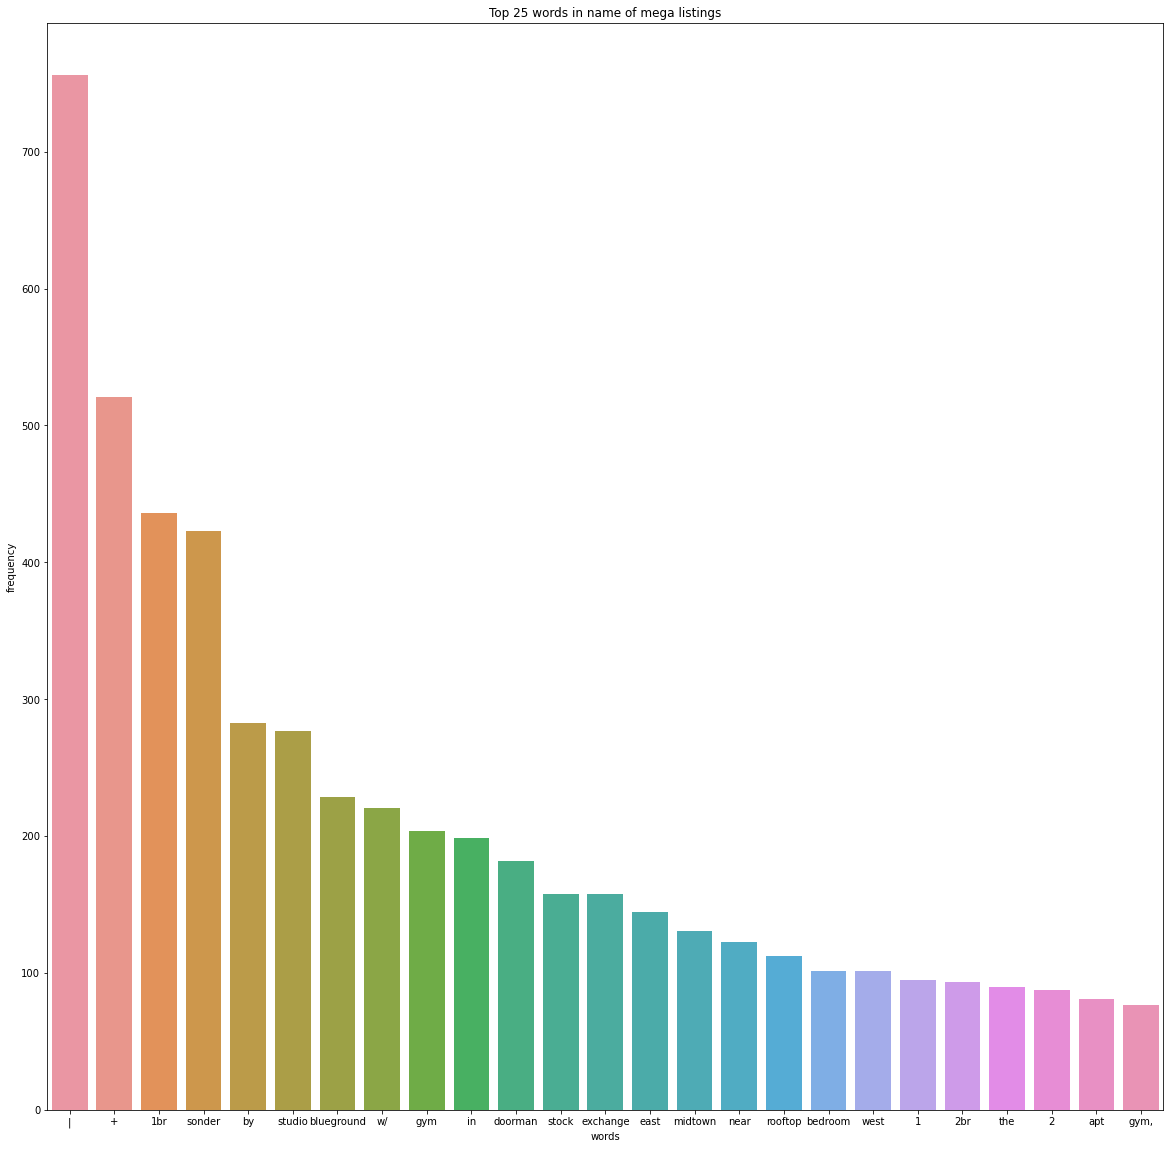

In [140]:
# Plot top 25 words in mega hosts
plt.figure(figsize=(20,20))
sns.barplot(x = 0, y = 1, data = top25_mega)
plt.title("Top 25 words in name of mega listings")
plt.xlabel("words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

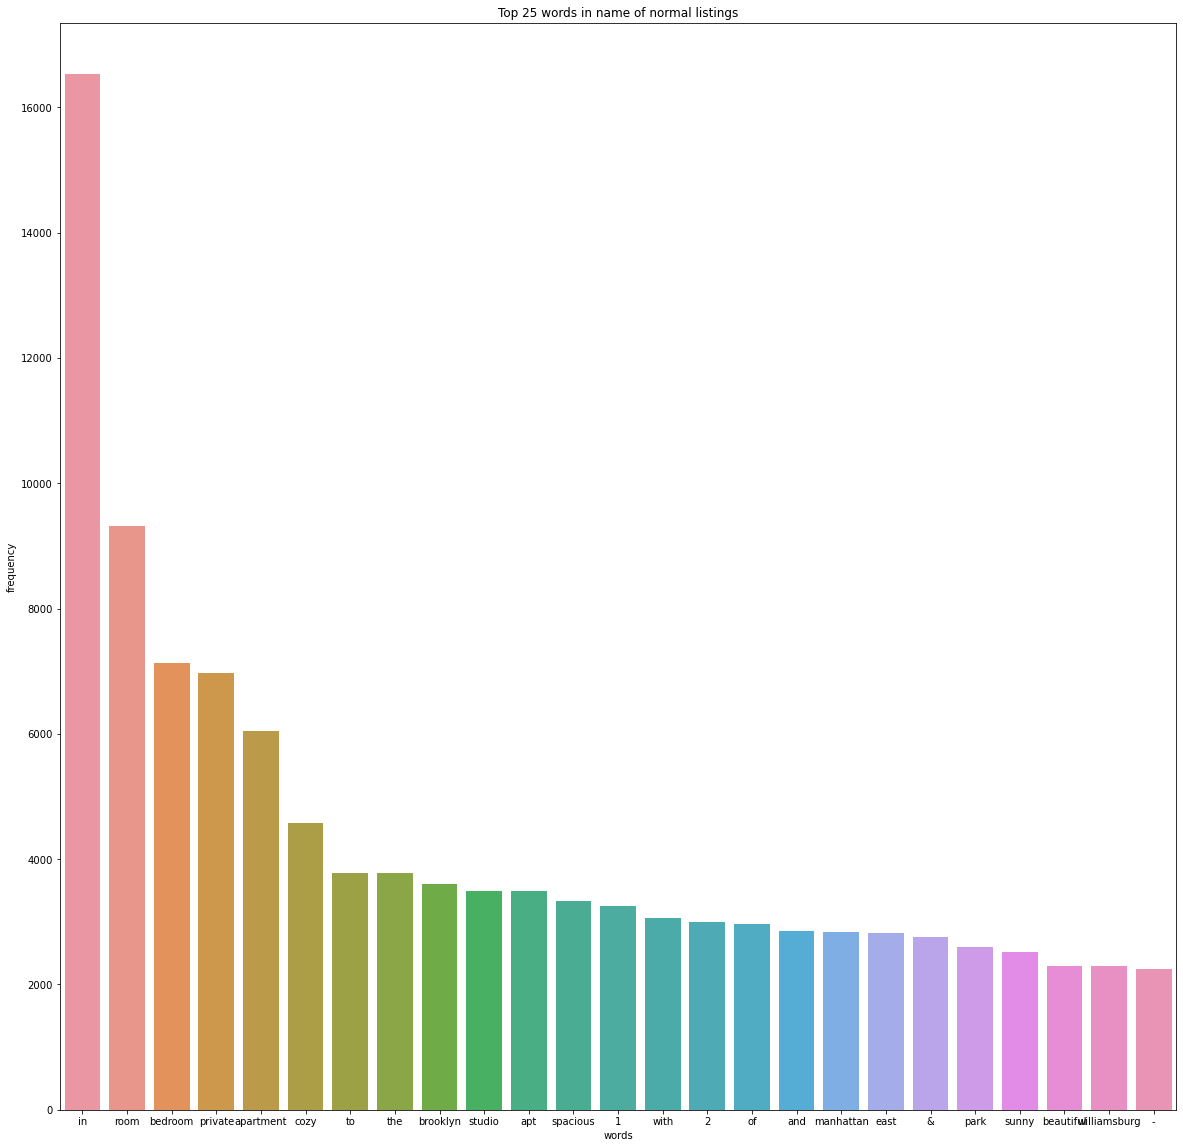

In [141]:
# Plot top 25 words in normal hosts
plt.figure(figsize=(20,20))
sns.barplot(x = 0, y = 1, data = top25_normal)
plt.title("Top 25 words in name of normal listings")
plt.xlabel("words")
plt.ylabel("frequency")

In [142]:
pd.options.display.max_colwidth = 100
name_top1 = mega[mega.host_id == 219517861]
name_top1.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,327,81
39771,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,327,137
39772,30937595,Sonder | 11th Ave | Bright 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,185,29,1,327,281
39773,30937596,Sonder | 11th Ave | Contemporary 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,327,332
39774,30937597,Sonder | The Nash | Pristine Studio + Gym,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74884,-73.97589,Entire home/apt,252,2,7,327,117
39775,30937598,Sunny 1BR in Hell's Kitchen by Sonder,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76079,-73.99807,Entire home/apt,189,29,1,327,325


In [143]:
name_top2 = mega[mega.host_id == 107434423]
name_top2.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near the 6th street by Blueground",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,308,30,0,232,156
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorman by Blueground",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,232,310
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Central by Blueground",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt,289,30,0,232,223
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtown by Blueground",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,232,326
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck by Blueground",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt,323,30,0,232,316
31575,24594717,"Large, Bright Midtown East 1 BR in Luxury building by Blueground",107434423,Blueground,Manhattan,Kips Bay,40.74112,-73.98009,Entire home/apt,271,30,0,232,326
31973,24960138,"Bright, Winged Tribeca Studio w/ Indoor pool, Gym by Blueground",107434423,Blueground,Manhattan,Tribeca,40.71686,-74.00484,Entire home/apt,305,30,0,232,6
32788,25823670,"Adorable UES Studio w/ Balcony, Gym + Doorman by Blueground",107434423,Blueground,Manhattan,Upper East Side,40.77669,-73.95673,Entire home/apt,211,30,1,232,201
34048,26982403,Enchanting 1BR near Times Sq w/ Indoor pool + Gym by Blueground,107434423,Blueground,Manhattan,Theater District,40.76196,-73.98536,Entire home/apt,280,30,2,232,218
35411,28095496,"Roomy FiDi 1BR w/ Gym, Roof deck + Doorman by Blueground",107434423,Blueground,Manhattan,Financial District,40.70427,-74.00964,Entire home/apt,285,30,1,232,324


In [144]:
name_top3 = mega[mega.host_id == 30283594]
name_top3.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,121,364
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,30,0,121,174
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,30,0,121,364
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,30,0,121,201
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,30,3,121,161
10530,8078896,Upscale Studio Apt in NYC'S Theatre District!,30283594,Kara,Manhattan,Theater District,40.76145,-73.98556,Entire home/apt,203,30,0,121,365
10531,8081037,Lavish Studio with Great Amenities in FiDi,30283594,Kara,Manhattan,Financial District,40.70550,-74.00812,Entire home/apt,189,30,4,121,365
10643,8185845,1-Bedroom Upper East Side Apartment!,30283594,Kara,Manhattan,Upper East Side,40.76391,-73.95938,Entire home/apt,249,30,2,121,273
10803,8319784,~Lavish 1 Bedroom Upper East Side NYC Apt!,30283594,Kara,Manhattan,Upper East Side,40.76483,-73.95801,Entire home/apt,249,30,1,121,273
10804,8320129,Cozy Studio Apt Upper East Side Near Hospitals,30283594,Kara,Manhattan,Upper East Side,40.76137,-73.96042,Entire home/apt,199,30,3,121,365


## Number of listings distributed in neighborhood groups

Text(0.5, 1.0, 'number of listings of different neighbourhood group')

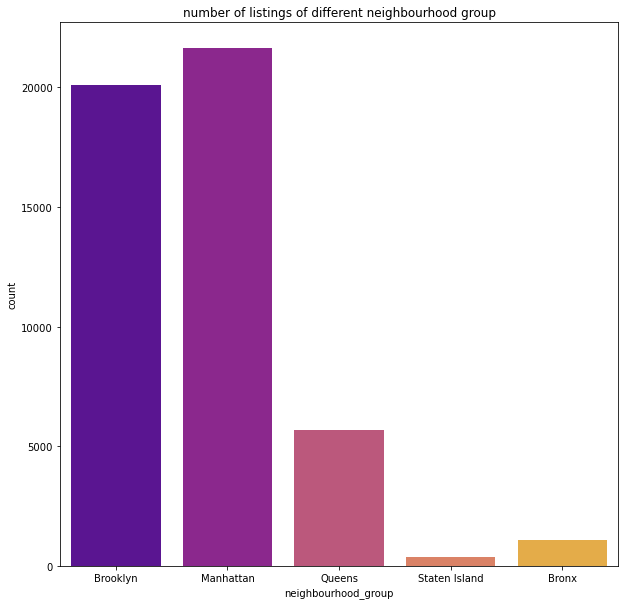

In [145]:
# Plot number of listings of different neighbourhood group
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'neighbourhood_group', palette="plasma")
plt.title("number of listings of different neighbourhood group")

Text(0.5, 1.0, 'number of listings of different neighbourhood group of normal hosts')

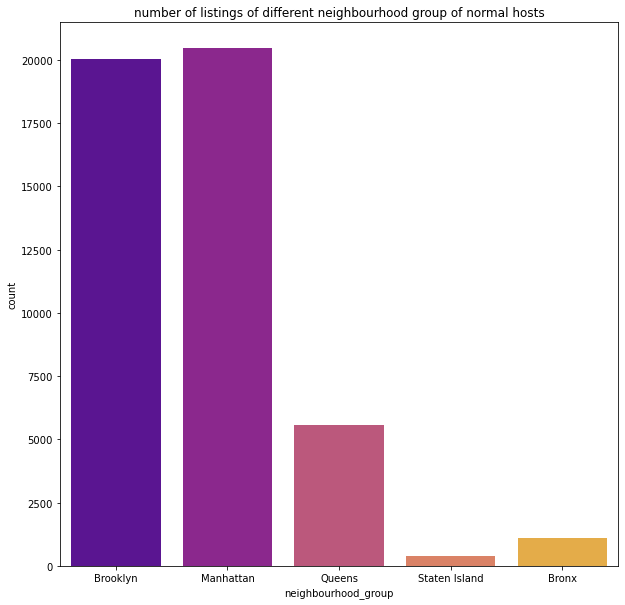

In [146]:
# Plot number of listings of different neighbourhood group of normal hosts
plt.figure(figsize=(10,10))
sns.countplot(data = normal, x = 'neighbourhood_group', palette="plasma")
plt.title("number of listings of different neighbourhood group of normal hosts")

Text(0.5, 1.0, 'number of listings of different neighbourhood group of mega hosts')

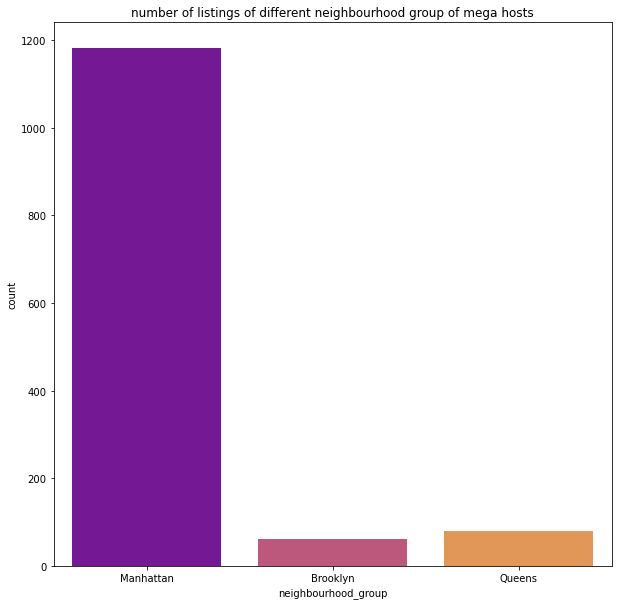

In [147]:
# Plot number of listings of different neighbourhood group of mega hosts
plt.figure(figsize=(10,10))
sns.countplot(data = mega, x = 'neighbourhood_group', palette="plasma")
plt.title("number of listings of different neighbourhood group of mega hosts")

## Number of listings of room types

Text(0.5, 1.0, 'number of listings of different room type')

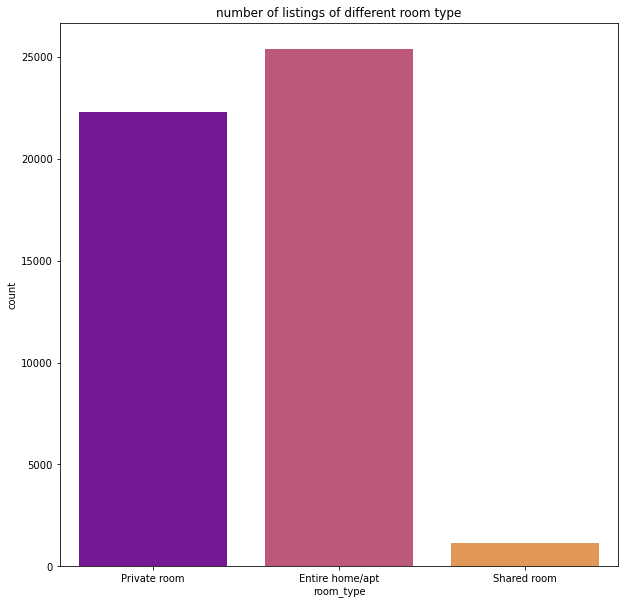

In [148]:
# Plot number of listings of different room type
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'room_type', palette="plasma")
plt.title("number of listings of different room type")

Text(0.5, 1.0, 'number of listings of different room type of normal hosts')

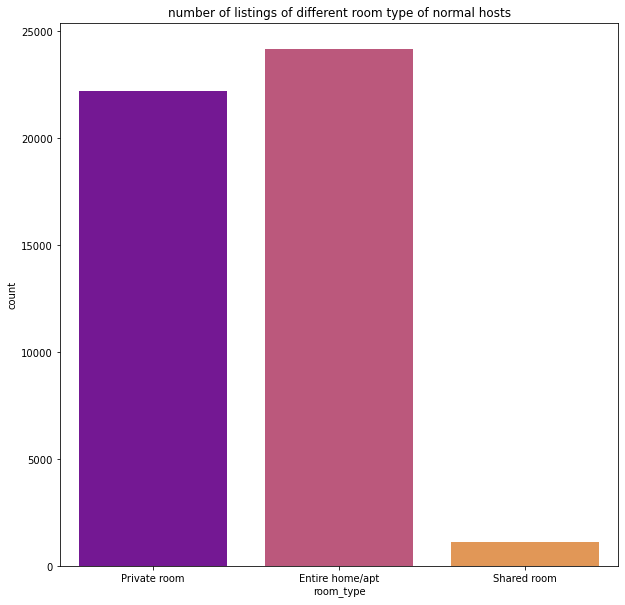

In [149]:
# Plot number of listings of different room type of normal hosts
plt.figure(figsize=(10,10))
sns.countplot(data = normal, x = 'room_type', palette="plasma")
plt.title("number of listings of different room type of normal hosts")

Text(0.5, 1.0, 'number of listings of different room type of mega hosts')

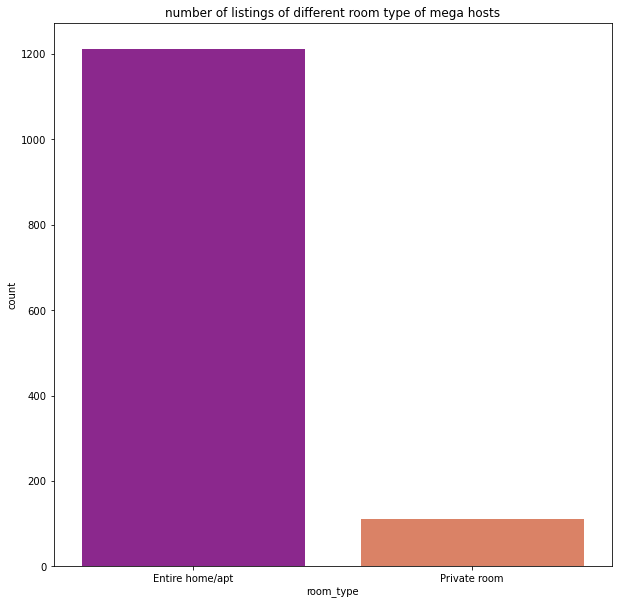

In [150]:
# Plot number of listings of different room type of mega hosts
plt.figure(figsize=(10,10))
sns.countplot(data = mega, x = 'room_type', palette="plasma")
plt.title("number of listings of different room type of mega hosts")

## Distribution of Top 11 mega hosts' listings

Text(0.5, 1.0, 'Distribution of listings in NYC of the first mega host')

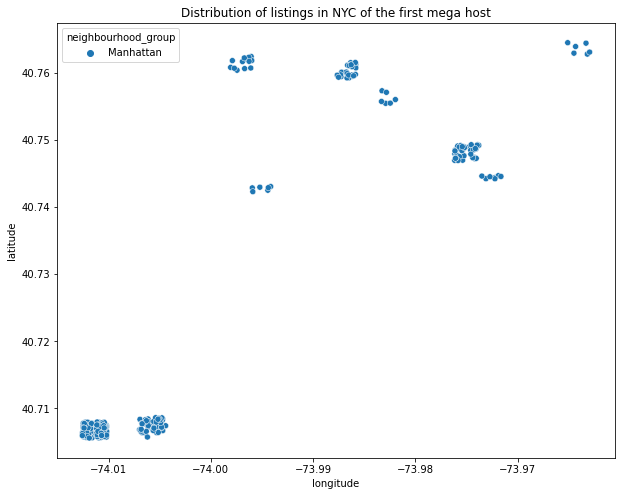

In [151]:
# Plot map of the first place mega host listings
df1 = df[df.host_id == 219517861]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df1, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the first mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the second mega host')

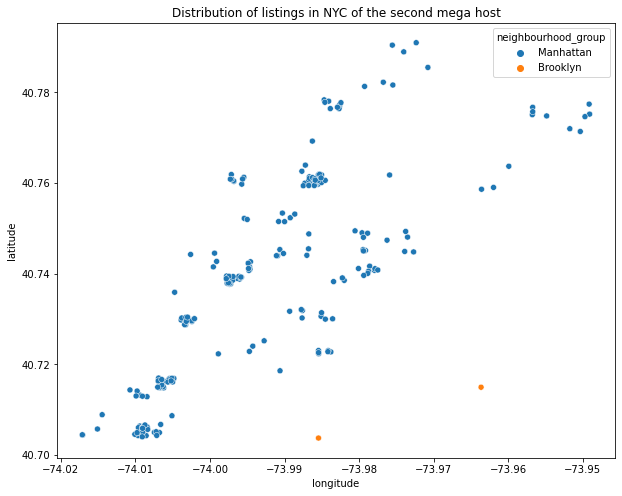

In [152]:
# Plot map of the second place mega host listings
df2 = df[df.host_id == 107434423]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df2, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the second mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the third mega host')

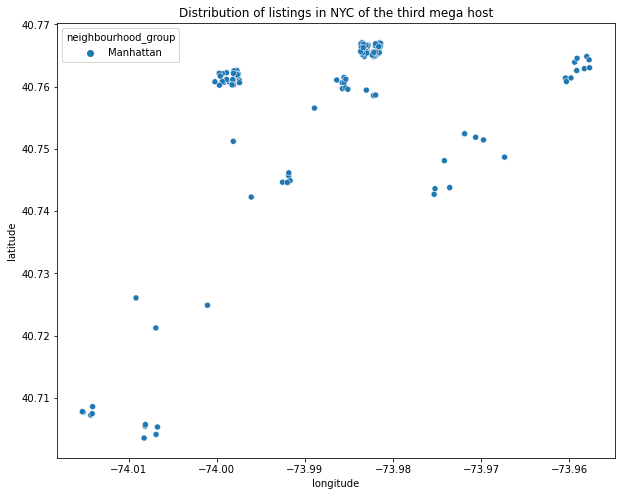

In [153]:
# Plot map of the third place mega host listings
df3 = df[df.host_id == 30283594]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df3, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the third mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the fourth mega host')

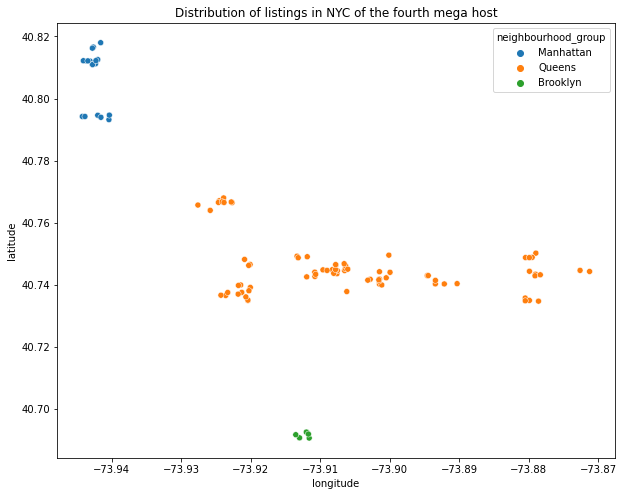

In [154]:
# Plot map of the fourth place mega host listings
df4 = df[df.host_id == 137358866]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df4, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the fourth mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the fifth mega host')

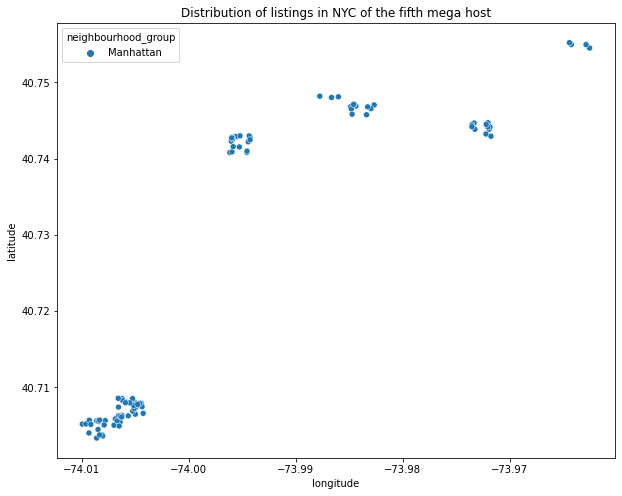

In [155]:
# Plot map of the fifth place mega host listings
df5 = df[df.host_id == 12243051]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df5, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the fifth mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the sixth mega host')

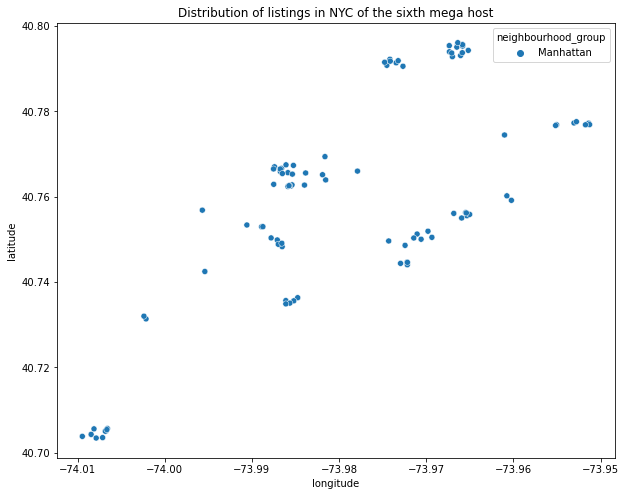

In [156]:
# Plot map of the sixth place mega host listings
df6 = df[df.host_id == 16098958]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df6, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the sixth mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the seventh mega host')

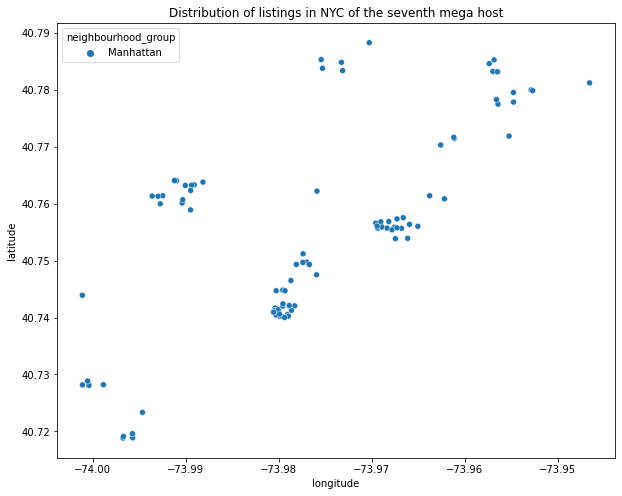

In [157]:
# Plot map of the seventh place mega host listings
df7 = df[df.host_id == 61391963]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df7, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the seventh mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the eighth mega host')

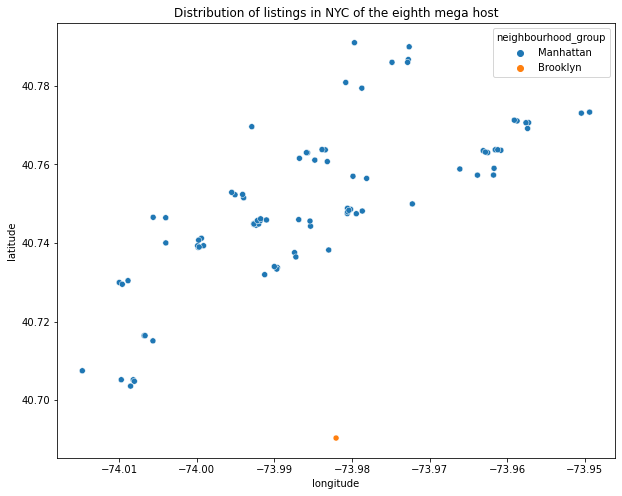

In [158]:
# Plot map of the eighth place mega host listings
df8 = df[df.host_id == 22541573]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df8, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the eighth mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the ninth mega host')

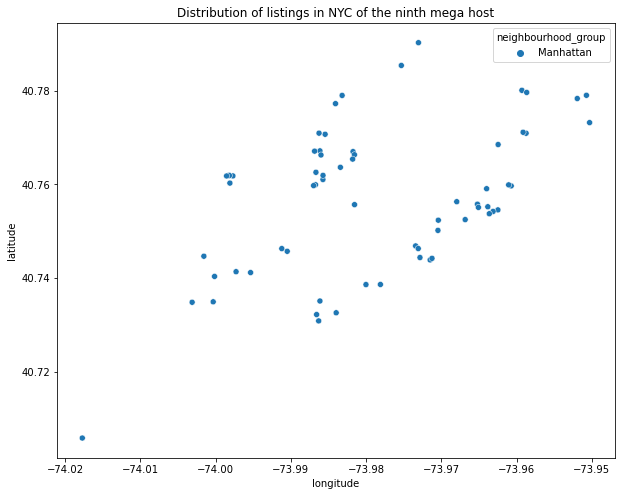

In [159]:
# Plot map of the ninth place mega host listings
df9 = df[df.host_id == 200380610]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df9, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the ninth mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the tenth mega host')

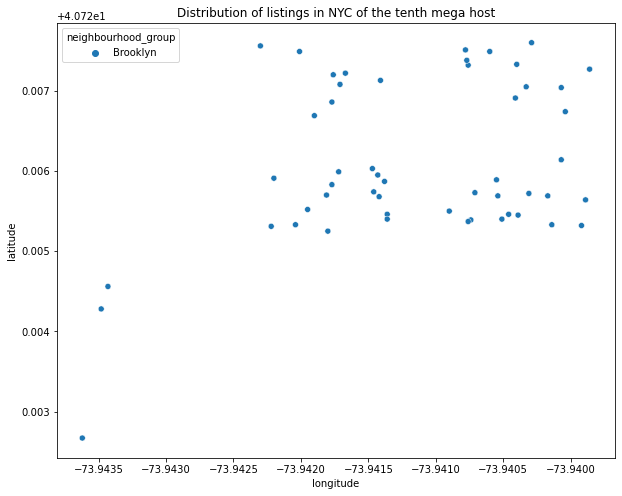

In [160]:
# Plot map of the tenth place mega host listings
df10 = df[df.host_id == 7503643]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df10, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the tenth mega host")

Text(0.5, 1.0, 'Distribution of listings in NYC of the eleventh mega host')

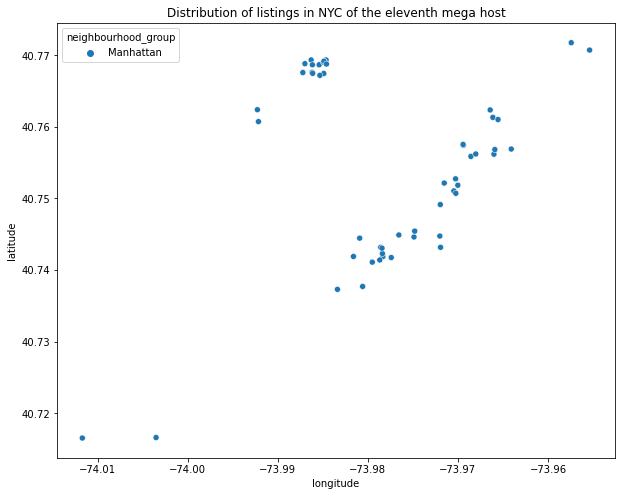

In [161]:
# Plot map of the eleventh place mega host listings
df11 = df[df.host_id == 1475015]
plt.figure(figsize=(10,8))
sns.scatterplot(data = df11, x = "longitude", y = "latitude", hue = "neighbourhood_group")
plt.ioff()
plt.title("Distribution of listings in NYC of the eleventh mega host")